In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage import morphology

#anaconda torch is the environment


# from skimage.transform import rotate
# from skimage.feature import local_binary_pattern
# from skimage import data
from skimage.color import label2rgb

Packages for this project

pip install numpy
pip install matplotlib
pip install opencv-python
pip install scikit-image
pip install pyfftw

#to install phasepack 
#go to the directory phasepack-1.5
#and type: 
#python setup.py install

In [2]:
from phasepack import phasesym

c:\Users\Novalis\anaconda3\lib\site-packages\phasepack\tools.py:11: UserWarning: 
Module 'pyfftw' (FFTW Python bindings) could not be imported. To install it, try
running 'pip install pyfftw' from the terminal. Falling back on the slower
'fftpack' module for 2D Fourier transforms.
  warnings.warn("""


In [4]:
from skimage.color import label2rgb

def seis_cube(file,nx,ni,ns):
    size_data=[nx*1,ni*1,ns*1]
    seis=np.fromfile(file,dtype=np.float32)
    seis=np.reshape(seis,size_data)
    return seis


def imgs_show(im1,im2,title1='image 1',title2='image 2'):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(im1,cmap='gray')
    ax1.set_title(title1)
    ax2.imshow(im2,cmap='gray')
    ax2.set_title(title2)

def im_rescale(img,mi=0,ma=1):
    imi=img.min()
    ima=img.max()
    d=ima-imi
    imgr=mi+(img-imi)*ma/d
    return imgr
    
def img_show(im,cmp='gray'):
    plt.imshow(im,cmap=cmp)

def seis_show(im):
    plt.imshow(im,cmap=plt.cm.seismic)


def rem_small_objs1(image,disk=1):
    footprint=morphology.disk(disk)
    res= morphology.white_tophat(image, footprint)
    return image-res

def rem_small_objs2(image,min_size=64,con=1):
    imager=im_rescale(image)*255 
    imager=imager.astype(int)
    res= morphology.remove_small_objects(imager,min_size,connectivity=con)
    return imager-res    


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)

#float image  to grayscale
def im2gray(im):
    imr=im_rescale(im,0,255)
    imr=imr.astype(np.uint8)
    return imr




In [5]:
from scipy.ndimage import filters
def sobel_edge_detection(image):
    """
    Apply the Sobel edge detection algorithm to the input image.

    Parameters:
        image (numpy array): The input image, assumed to be grayscale.

    Returns:
        edges (numpy array): The output edge map, where each pixel is 0 or 1.
    """

    # Define the Sobel kernels
    Kx = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

    # Apply the Sobel kernels to the image
    Gx = filters.convolve(image, Kx )
    Gy = filters.convolve(image, Ky)

    # Compute the gradient magnitude and direction
    G = np.sqrt(Gx**2 + Gy**2)
    theta = np.arctan2(Gy, Gx)

    # Apply non-maximum suppression to thin the edges
    edges = np.zeros_like(image)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            if theta[i, j] < 0:
                theta[i, j] += np.pi
            elif theta[i, j] > np.pi:
                theta[i, j] -= np.pi
            dx = int(np.round(theta[i, j]/np.pi*2))
            dy = 1 - dx
            if G[i-dx, j-dy] >= G[i, j]:
                edges[i, j] = 0
            else:
                edges[i, j] = 255

    return edges.astype(np.uint8)

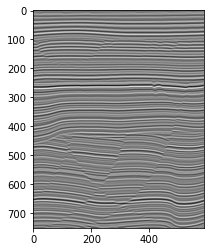

In [6]:
#loading some seismic image  extratted from seismic cube


seis_im50=np.load('seis_im50.npy')
mask_im50=np.load('mask_im50.npy')
#displaying in gray scale
img_show(seis_im50)
plt.show()


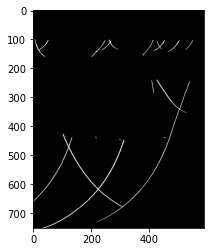

In [8]:
#and this an exmaple of anotation of faults in the image
img_show(mask_im50) 

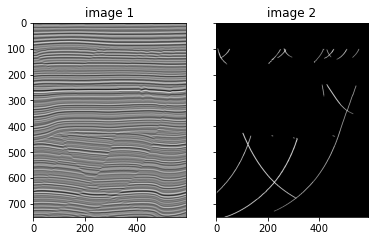

In [7]:
#showing both
imgs_show(seis_im50,mask_im50)

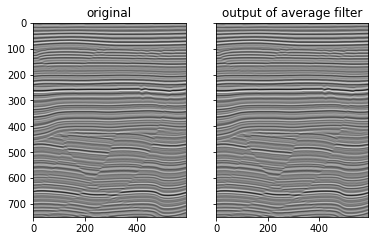

In [9]:
#here we introduce some examples of image convolution 
#using tipical filters (small array usually 3X3 5X5 size)
# average filter which smooth the image 
average_filter= np.ones((5,5),np.float32)/25
# horizontal sobel filter , which ennhaces edges in horizontal direction 
sobel_h=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
# vertical  sobel filter , which ennhaces edges in vertical direction 
sobel_v=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

#For convolving the image, we use opencv libary (cv2)

out_seis_im50 = cv2.filter2D(seis_im50,-1,average_filter)
imgs_show(out_seis_im50,out_seis_im50,'original','output of average filter')  

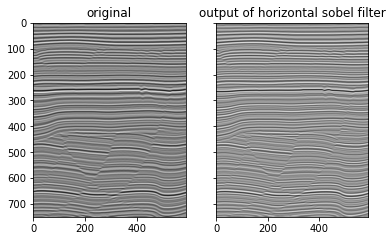

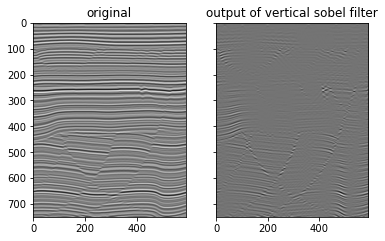

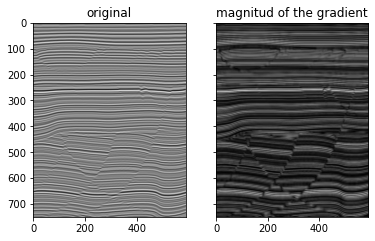

In [10]:
dsth = cv2.filter2D(out_seis_im50,-1,sobel_h)
imgs_show(out_seis_im50,dsth,'original','output of horizontal sobel filter')  

dstv = cv2.filter2D(out_seis_im50,-1,sobel_v)
imgs_show(out_seis_im50,dstv,'original','output of vertical sobel filter')  

#magnitud of the Sobel gradient
mag=np.sqrt(dstv*dstv+dsth*dsth)
imgs_show(seis_im50,mag,'original','magnitud of the gradient')  

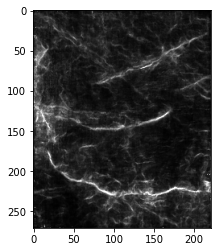

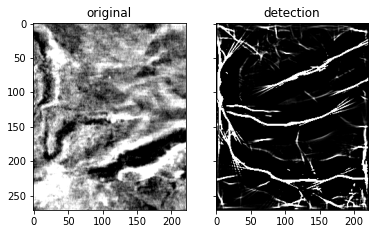

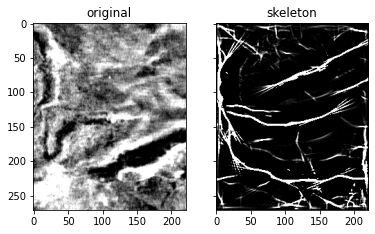

In [11]:
#some addtional seismic images

imgeo273=np.load('imgeo273.npy')
img_show(imgeo273)

#detect atribute from the image273
imgeo273_dtc=np.load('imgeo273_dtc.npy')
img_show(imgeo273_dtc)

#displaying both images
imgs_show(imgeo273,imgeo273_dtc, 'original','detection')

#skeleton  atribute from the imageo273
imgeo273_sk=np.load('imgeo273_sk.npy')
img_show(imgeo273_sk)

#displaying both images
imgs_show(imgeo273,imgeo273_sk, 'original','skeleton')

#now we apply another concept to the dtect attribute 
# def phasesym(img, nscale=5, norient=6, minWaveLength=3, mult=2.1,
#              sigmaOnf=0.55, k=2., polarity=0, noiseMethod=-1):
#     """
#     This function calculates the phase symmetry of points in an image. This is
#     a contrast invariant measure of symmetry. This function can be used as a
#     line and blob detector. The greyscale 'polarity' of the lines that you
#     want to find can be specified.

#     Arguments:
#     -----------
#     <Name>      <Default>   <Description>
#     img             N/A     The input image
#     nscale          5       Number of wavelet scales, try values 3-6
#     norient         6       Number of filter orientations.
#     minWaveLength   3       Wavelength of smallest scale filter.
#     mult            2.1     Scaling factor between successive filters.
#     sigmaOnf        0.55    Ratio of the standard deviation of the Gaussian
#                             describing the log Gabor filter's transfer function
#                             in the frequency domain to the filter center
#                             frequency.
#     k               2.0     No. of standard deviations of the noise energy
#                             beyond the mean at which we set the noise threshold
#                             point. You may want to vary this up to a value of
#                             10 or 20 for noisy images
#     polarity        0       Controls 'polarity' of symmetry features to find.
#                             1 only return 'bright' features
#                             -1 only return 'dark' features
#                             0 return both 'bright' and 'dark' features
#     noiseMethod     -1      Parameter specifies method used to determine
#                             noise statistics.
#                             -1 use median of smallest scale filter responses
#                             -2 use mode of smallest scale filter responses
#                             >=0 use this value as the fixed noise threshold

#     Returns:
#     ---------
#     phaseSym        Phase symmetry image (values between 0 and 1).
#     orientation     Orientation image. Orientation in which local symmetry
#                     energy is a maximum, in degrees (0-180), angles positive
#                     anti-clockwise. Note that the orientation info is quantized
#                     by the number of orientations
#     totalEnergy     Un-normalised raw symmetry energy which may be more to your
#                     liking.
#     T               Calculated noise threshold (can be useful for diagnosing
#                     noise characteristics of images). Once you know this you
#                     can then specify fixed thresholds and save some computation
#                     time.


#display the result:

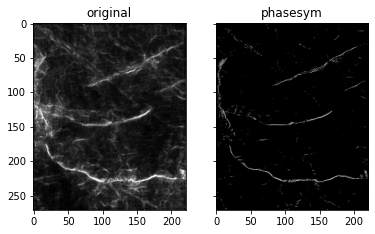

In [46]:
    
im_phasesym, orientation, totalEnergy, T=phasesym(imgeo273_dtc, nscale=5, norient=6,minWaveLength=3, \
         mult=2.1,sigmaOnf=0.55, k=2., polarity=0, noiseMethod=-1)
    
imgs_show(imgeo273_dtc,im_phasesym,'original','phasesym')


In [47]:
def autothresh(image):
#Automatic threshold method
# @param image: image to segment
#@return : threshold value
# """
    s = 0.5*( np.amin(image) + np.amax(image))
    done = False
    while ~done:
        B = image>=s;
        sNext = .5*( np.mean(image[B]) + np.mean(image[~B]))
        done = abs(s-sNext)<.5
        s = sNext
    return s

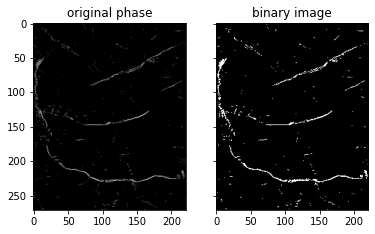

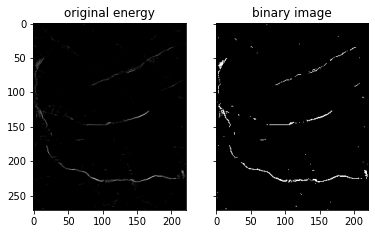

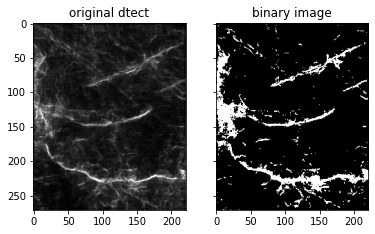

In [48]:
totalEnergyn=im2gray(totalEnergy)
imgeo273_dtcn=im2gray(imgeo273_dtc)
im_phasesymn=im2gray(im_phasesym)

s=autothresh(totalEnergyn)
s2=autothresh(imgeo273_dtcn)
s3=autothresh(im_phasesymn)

imgs_show(im_phasesymn,im_phasesymn>s3,'original phase','binary image')
plt.show()
imgs_show(totalEnergyn,totalEnergyn>s,'original energy','binary image')
plt.show()
imgs_show(imgeo273_dtcn,imgeo273_dtcn>s2,'original dtect','binary image') 
plt.show()

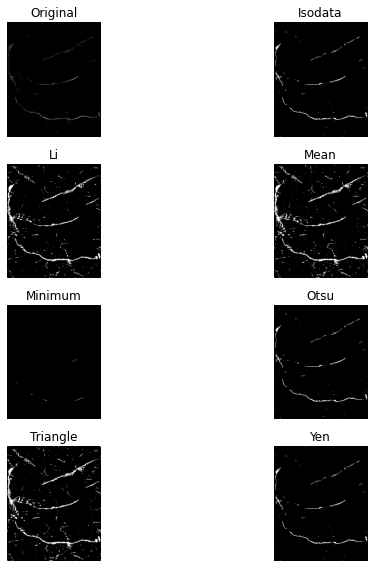

In [15]:
from skimage import data
from skimage.filters import try_all_threshold
img=totalEnergyn
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [16]:
from skimage.filters import threshold_otsu, threshold_local

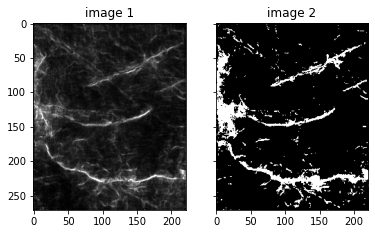

In [41]:
s_otsu = threshold_otsu( imgeo273_dtcn)
img_s_otsu = imgeo273_dtcn > s_otsu
imgs_show(imgeo273_dtcn,imgeo273_dtcn>s_otsu)
plt.show()

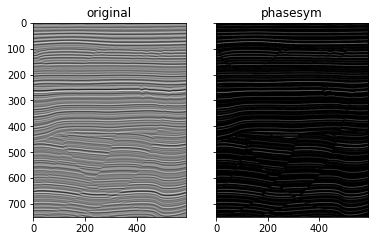

In [18]:
im_phasesym, orientation, totalEnergy, T=phasesym(seis_im50, nscale=5, norient=6,minWaveLength=2, \
         mult=2.1,sigmaOnf=0.55, k=4., polarity=1, noiseMethod=-1)
    
imgs_show(seis_im50,totalEnergy,'original','phasesym')

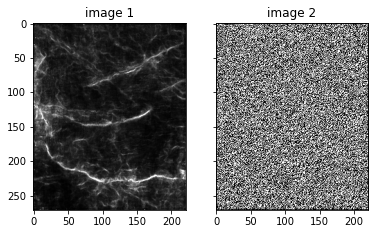

In [19]:
#sobel 
imgeo273_dtcn=im_rescale(imgeo273_dtc,mi=0,ma=1)
#seis_img50 to gray scale
imgeo273_dtcn=(imgeo273_dtcn*255).astype(np.uint8)

edges = sobel_edge_detection(imgeo273_dtcn)
imgs_show(imgeo273_dtc,edges)
plt.show()

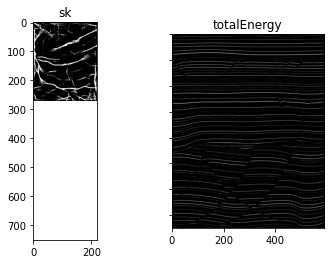

In [20]:
#compaering with attribute skeleton


imgs_show(imgeo273_sk,totalEnergy,'sk','totalEnergy')

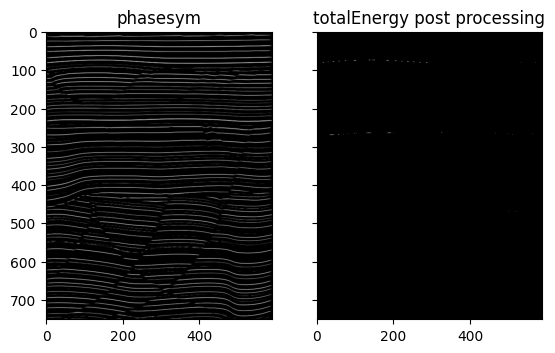

In [29]:
#post processing
#morphological operations

im_totalEnergy_mo=rem_small_objs2(totalEnergy,min_size=12,con=1)
imgs_show(im_phasesym,im_totalEnergy_mo,'phasesym','totalEnergy post processing')    

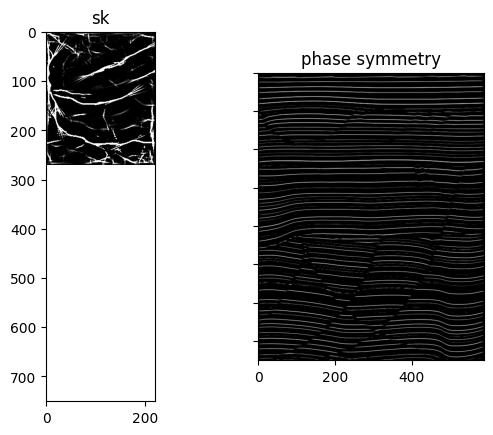

In [30]:
#compaering with attribute skeleton


imgs_show(imgeo273_sk,im_phasesym,'sk','phase symmetry')

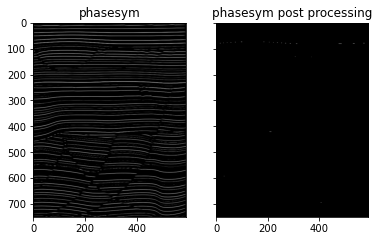

In [22]:
#post processing
#morphological operations

im_phasesym_mo=rem_small_objs2(im_phasesym,min_size=12,con=1)
imgs_show(im_phasesym,im_phasesym_mo,'phasesym','phasesym post processing')    


In [21]:
from skimage.morphology import medial_axis, binary

In [33]:
#seis_im50n=im_rescale(seis_im50,0,1)
img=im2gray(seis_im50)

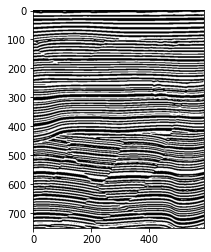

In [34]:
#img=seis_im50n
s=autothresh(img)
imb=img>s
plt.imshow(imb,cmap='gray')


In [42]:
# Compute the medial axis transform
medial_axis_image = medial_axis(imb)
medial_axis_image2 = medial_axis(img_s_otsu)

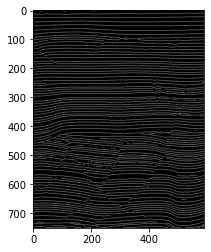

In [40]:
plt.imshow(medial_axis_image,cmap='gray')

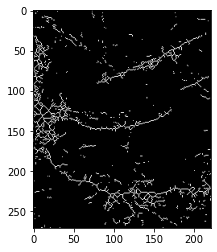

In [43]:
plt.imshow(medial_axis_image2,cmap='gray')

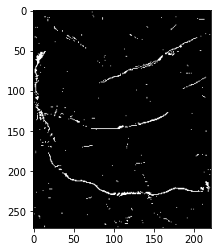

In [50]:
imb3=im_phasesymn>s3
plt.imshow(imb3,cmap='gray')

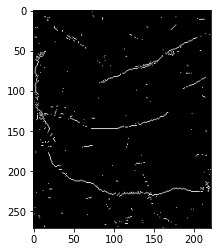

In [51]:
medial_axis_image3 = medial_axis(imb3)
plt.imshow(medial_axis_image3,cmap='gray')
